<a href="https://colab.research.google.com/github/keerthana0316/wd101/blob/main/genetics_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Genetics_dataset = pd.read_csv("/content/drive/MyDrive/dataset/train_genetic_disorders.csv")
Genetics_dataset_test = pd.read_csv("/content/drive/MyDrive/dataset/test_genetic_disorders.csv")
df = Genetics_dataset.copy()
df2 = Genetics_dataset_test.copy()

Mounted at /content/drive


In [ ]:
df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
df.tail()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [ ]:
df.shape

(22083, 45)

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        21011 non-null  object 
 1   Patient Age                                       19643 non-null  float64
 2   Genes in mother's side                            21011 non-null  object 
 3   Inherited from father                             20724 non-null  object 
 4   Maternal gene                                     18317 non-null  object 
 5   Paternal gene                                     21011 non-null  object 
 6   Blood cell count (mcL)                            21011 non-null  float64
 7   Patient First Name                                21011 non-null  object 
 8   Family Name                                       11771 non-null  object 
 9   Father's name    

In [ ]:
print(df.isna().sum())

Patient Id                                           1072
Patient Age                                          2440
Genes in mother's side                               1072
Inherited from father                                1359
Maternal gene                                        3766
Paternal gene                                        1072
Blood cell count (mcL)                               1072
Patient First Name                                   1072
Family Name                                         10312
Father's name                                        1072
Mother's age                                         6790
Father's age                                         6761
Institute Name                                       5932
Location of Institute                                1072
Status                                               1072
Respiratory Rate (breaths/min)                       3131
Heart Rate (rates/min                                3097
Test 1        

In [ ]:
df.drop(["Patient Id", "Patient First Name", "Family Name", "Father's name", "Parental consent", "Place of birth", "Location of Institute", "Institute Name"], inplace=True, axis=1)


In [ ]:
for c in df.columns:
    if df[c].dtype == object:
        print("\n", df[c].value_counts())


 Genes in mother's side
Yes    12509
No      8502
Name: count, dtype: int64

 Inherited from father
No     12508
Yes     8216
Name: count, dtype: int64

 Maternal gene
Yes    10125
No      8192
Name: count, dtype: int64

 Paternal gene
No     11887
Yes     9124
Name: count, dtype: int64

 Status
Alive       10572
Deceased    10439
Name: count, dtype: int64

 Respiratory Rate (breaths/min)
Normal (30-60)    9595
Tachypnea         9357
Name: count, dtype: int64

 Heart Rate (rates/min
Normal         9715
Tachycardia    9271
Name: count, dtype: int64

 Follow-up
Low     9564
High    9377
Name: count, dtype: int64

 Gender
Ambiguous    6385
Male         6321
Female       6242
Name: count, dtype: int64

 Birth asphyxia
Yes              4839
Not available    4755
No record        4752
No               4607
Name: count, dtype: int64

 Autopsy shows birth defect (if applicable)
Not applicable    10572
Yes                3217
No                 3058
Name: count, dtype: int64

 Folic acid detai

In [ ]:
print(df["Birth asphyxia"].value_counts())

Birth asphyxia
Yes              4839
Not available    4755
No record        4752
No               4607
Name: count, dtype: int64


In [ ]:
df["Birth asphyxia"] = df["Birth asphyxia"].replace("No record",np.NaN)
df["Birth asphyxia"] = df["Birth asphyxia"].replace("Not available",np.NaN)

In [ ]:
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("None",np.NaN)
df["Autopsy shows birth defect (if applicable)"] = df["Autopsy shows birth defect (if applicable)"].replace("Not applicable",np.NaN)

In [ ]:
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("Not applicable",np.NaN)
df["H/O radiation exposure (x-ray)"] = df["H/O radiation exposure (x-ray)"].replace("-",np.NaN)


In [ ]:
df["H/O substance abuse"] = df["H/O substance abuse"].replace("Not applicable",np.NaN)
df["H/O substance abuse"] = df["H/O substance abuse"].replace("-",np.NaN)

In [ ]:
df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,19643.000000,21011.000000,15293.000000,15322.000000,18992.0,18958.0,18970.0,18962.0,18939.0,18957.000000,18965.000000,18955.000000,18899.000000,19008.000000,18987.000000,18956.000000
mean,6.974851,4.899004,34.522527,41.942436,0.0,0.0,0.0,1.0,0.0,2.000106,7.484680,0.592034,0.552886,0.537405,0.497393,0.460804
std,4.322584,0.199829,9.847256,13.027701,0.0,0.0,0.0,0.0,0.0,1.411488,2.653633,0.491470,0.497208,0.498612,0.500006,0.498474
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763230,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.419026,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899548,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.473071,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033977,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.528684,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<ipython-input-18-511870db41e3>:2: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


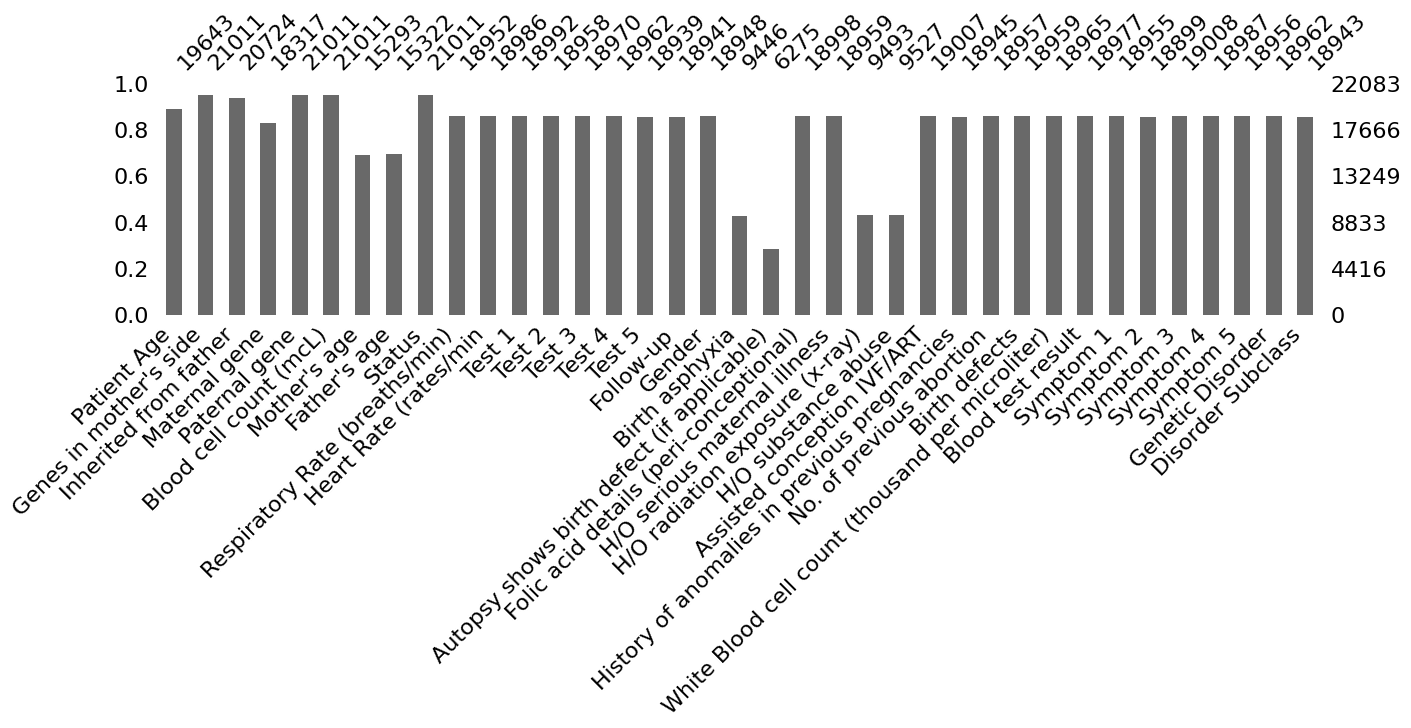

In [ ]:
msno.bar(df,figsize=(15,3))
plt.tight_layout()
plt.show()

In [ ]:
df.drop(["Birth asphyxia", "Autopsy shows birth defect (if applicable)"], inplace=True, axis=1)

In [ ]:
df["Patient Age"].fillna(str(df["Patient Age"].mode().values[0]),inplace=True)
df["Genes in mother's side"].fillna(str(df["Genes in mother's side"].mode().values[0]),inplace=True)
df["Maternal gene"].fillna(str(df["Maternal gene"].mode().values[0]),inplace=True)
df["Paternal gene"].fillna(str(df["Paternal gene"].mode().values[0]),inplace=True)
df["Inherited from father"].fillna(str(df["Inherited from father"].mode().values[0]),inplace=True)
df["Blood cell count (mcL)"].fillna(str(df["Blood cell count (mcL)"].mode().values[0]),inplace=True)
df["Mother's age"].fillna(df["Mother's age"].mode().values[0],inplace=True)
df["Status"].fillna(df["Status"].mode().values[0],inplace=True)
df["Father's age"].fillna(df["Father's age"].mode().values[0],inplace=True)
df["Test 1"].fillna(df["Test 1"].mode().values[0],inplace=True)
df["Test 2"].fillna(df["Test 2"].mode().values[0],inplace=True)
df["Test 3"].fillna(df["Test 3"].mode().values[0],inplace=True)
df["Test 4"].fillna(df["Test 4"].mode().values[0],inplace=True)
df["Test 5"].fillna(df["Test 5"].mode().values[0],inplace=True)
df["Respiratory Rate (breaths/min)"].fillna(str(df["Respiratory Rate (breaths/min)"].mode().values[0]),inplace=True)
df["Heart Rate (rates/min"].fillna(str(df["Heart Rate (rates/min"].mode().values[0]),inplace=True)
df["Follow-up"].fillna(str(df["Follow-up"].mode().values[0]),inplace=True)
df["Gender"].fillna(str(df["Gender"].mode().values[0]),inplace=True)
df["Folic acid details (peri-conceptional)"].fillna(str(df["Folic acid details (peri-conceptional)"].mode().values[0]),inplace=True)
df["H/O serious maternal illness"].fillna(str(df["H/O serious maternal illness"].mode().values[0]),inplace=True)
df["H/O radiation exposure (x-ray)"].fillna(str(df["H/O radiation exposure (x-ray)"].mode().values[0]),inplace=True)
df["H/O substance abuse"].fillna(str(df["H/O substance abuse"].mode().values[0]),inplace=True)
df["Assisted conception IVF/ART"].fillna(str(df["Assisted conception IVF/ART"].mode().values[0]),inplace=True)
df["Symptom 1"].fillna(df["Symptom 1"].mode().values[0],inplace=True)
df["Symptom 2"].fillna(df["Symptom 2"].mode().values[0],inplace=True)
df["Symptom 3"].fillna(df["Symptom 3"].mode().values[0],inplace=True)
df["Symptom 4"].fillna(df["Symptom 4"].mode().values[0],inplace=True)
df["Symptom 5"].fillna(df["Symptom 5"].mode().values[0],inplace=True)
df["History of anomalies in previous pregnancies"].fillna(str(df["History of anomalies in previous pregnancies"].mode().values[0]),inplace=True)
df["No. of previous abortion"].fillna(df["No. of previous abortion"].mode().values[0],inplace=True)
df["Birth defects"].fillna(str(df["Birth defects"].mode().values[0]),inplace=True)
df["White Blood cell count (thousand per microliter)"].fillna(df["White Blood cell count (thousand per microliter)"].median(),inplace=True)
df["Blood test result"].fillna(str(df["Blood test result"].mode().values[0]),inplace=True)
df["Genetic Disorder"].fillna(str(df["Genetic Disorder"].mode().values[0]),inplace=True)
df["Disorder Subclass"].fillna(str(df["Disorder Subclass"].mode().values[0]),inplace=True)

In [ ]:
print("NAN VALUES:\n")
print(df.isna().sum())

NAN VALUES:

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Test 1                                              0
Test 2                                              0
Test 3                                              0
Test 4                                              0
Test 5                                              0
Follow-up                                           0
Gender                                              0
Folic acid deta

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  object 
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             22083 non-null  object 
 3   Maternal gene                                     22083 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  object 
 6   Mother's age                                      22083 non-null  float64
 7   Father's age                                      22083 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

**copiying the processed train set
**

In [ ]:
train_processed=df.copy()

In [ ]:
encode_data = df.copy()
encoder = LabelEncoder()

encode_data["Genes in mother's side"] = encoder.fit_transform(encode_data["Genes in mother's side"])
encode_data["Inherited from father"] = encoder.fit_transform(encode_data["Inherited from father"])
encode_data["Maternal gene"] = encoder.fit_transform(encode_data["Maternal gene"])
encode_data["Paternal gene"] = encoder.fit_transform(encode_data["Paternal gene"])
encode_data["Mother's age"] = encoder.fit_transform(encode_data["Mother's age"])
encode_data["Paternal gene"] = encoder.fit_transform(encode_data["Paternal gene"])
encode_data["Status"] = encoder.fit_transform(encode_data["Status"])
encode_data["Respiratory Rate (breaths/min)"] = encoder.fit_transform(encode_data["Respiratory Rate (breaths/min)"])
encode_data["Heart Rate (rates/min"] = encoder.fit_transform(encode_data["Heart Rate (rates/min"])
encode_data["Follow-up"] = encoder.fit_transform(encode_data["Follow-up"])
encode_data["Gender"] = encoder.fit_transform(encode_data["Gender"])
encode_data["Folic acid details (peri-conceptional)"] = encoder.fit_transform(encode_data["Folic acid details (peri-conceptional)"])
encode_data["H/O serious maternal illness"] = encoder.fit_transform(encode_data["H/O serious maternal illness"])
encode_data["H/O radiation exposure (x-ray)"] = encoder.fit_transform(encode_data["H/O radiation exposure (x-ray)"])
encode_data["H/O substance abuse"] = encoder.fit_transform(encode_data["H/O substance abuse"])
encode_data["Assisted conception IVF/ART"] = encoder.fit_transform(encode_data["Assisted conception IVF/ART"])
encode_data["History of anomalies in previous pregnancies"] = encoder.fit_transform(encode_data["History of anomalies in previous pregnancies"])
encode_data["No. of previous abortion"] = encoder.fit_transform(encode_data["No. of previous abortion"])
encode_data["Birth defects"] = encoder.fit_transform(encode_data["Birth defects"])
encode_data["Blood test result"] = encoder.fit_transform(encode_data["Blood test result"])
encode_data["Genetic Disorder"] = encoder.fit_transform(encode_data["Genetic Disorder"])
encode_data["Disorder Subclass"] = encoder.fit_transform(encode_data["Disorder Subclass"])

In [ ]:
encode_data = encode_data.astype("float32")
print(encode_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 35 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Genes in mother's side                            22083 non-null  float32
 2   Inherited from father                             22083 non-null  float32
 3   Maternal gene                                     22083 non-null  float32
 4   Paternal gene                                     22083 non-null  float32
 5   Blood cell count (mcL)                            22083 non-null  float32
 6   Mother's age                                      22083 non-null  float32
 7   Father's age                                      22083 non-null  float32
 8   Status                                            22083 non-null  float32
 9   Respiratory Rate 

In [ ]:
print("Correlation:")
print(encode_data.corr())

Correlation:
                                                  Patient Age  \
Patient Age                                          1.000000   
Genes in mother's side                               0.047928   
Inherited from father                               -0.044549   
Maternal gene                                        0.042137   
Paternal gene                                       -0.048430   
Blood cell count (mcL)                              -0.143398   
Mother's age                                        -0.051133   
Father's age                                        -0.071938   
Status                                              -0.053370   
Respiratory Rate (breaths/min)                      -0.040260   
Heart Rate (rates/min                               -0.055413   
Test 1                                                    NaN   
Test 2                                                    NaN   
Test 3                                                    NaN   
Test 4      

In [ ]:
encode_data.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,1.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0.0,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,1.0,7.473071,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
#encode_data.to_csv("train_processed_encoded.csv")
train_processed_encoded=encode_data.copy()

In [ ]:
print("Covariance:")
print(encode_data.cov())

Covariance:
                                                  Patient Age  \
Patient Age                                         19.102108   
Genes in mother's side                               0.101931   
Inherited from father                               -0.094114   
Maternal gene                                        0.088964   
Paternal gene                                       -0.104227   
Blood cell count (mcL)                              -0.163456   
Mother's age                                        -2.183066   
Father's age                                        -4.663919   
Status                                              -0.116458   
Respiratory Rate (breaths/min)                      -0.086951   
Heart Rate (rates/min                               -0.119531   
Test 1                                               0.000000   
Test 2                                               0.000000   
Test 3                                               0.000000   
Test 4       

In [ ]:


df_encode = train_processed_encoded.copy()
df1=train_processed.copy()
train_processed_encoded.head()




,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,1.0,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,0.0,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,1.0,7.473071,2.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,1.0,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.0
4,11.0,1.0,0.0,1.0,1.0,4.720703,14.0,20.0,0.0,1.0,...,0.0,4.098210,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [ ]:
df_encode['Genetic Disorder'] = df1['Genetic Disorder']
df_encode['Disorder Subclass'] = df1['Disorder Subclass']
df_encode['Combined'] = df_encode['Genetic Disorder'].astype(str) + ' - ' + df_encode['Disorder Subclass']


In [ ]:
disorderSubclasses = df_encode.groupby(['Genetic Disorder','Disorder Subclass']).size()
disorderSubclasses.loc[disorderSubclasses < 250]

Genetic Disorder                              Disorder Subclass
Mitochondrial genetic inheritance disorders   Alzheimer's           18
                                              Cancer                 5
                                              Diabetes             157
                                              Hemochromatosis      119
Multifactorial genetic inheritance disorders  Alzheimer's          130
                                              Cancer                87
                                              Leigh syndrome       182
dtype: int64

In [ ]:
minor_classes = [
    'Mitochondrial genetic inheritance disorders - Alzheimer\'s',
    'Mitochondrial genetic inheritance disorders - Cancer',
    'Mitochondrial genetic inheritance disorders - Diabetes',
    'Mitochondrial genetic inheritance disorders - Hemochromatosis',
    'Multifactorial genetic inheritance disorders - Alzheimer\'s',
    'Multifactorial genetic inheritance disorders - Cancer',
    'Multifactorial genetic inheritance disorders - Leigh syndrome',
]
df_encode_bal = df_encode.loc[~df_encode['Combined'].isin(minor_classes)].reset_index(drop=True)
df_encode_bal

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass,Combined
0,2.0,1.0,0.0,1.0,0.0,4.760603,5.0,20.0,0.0,0.0,...,9.857562,3.0,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy,Mitochondrial genetic inheritance disorders - ...
1,4.0,1.0,1.0,0.0,0.0,4.910669,5.0,23.0,1.0,1.0,...,5.522560,2.0,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis,Mitochondrial genetic inheritance disorders - ...
2,6.0,1.0,0.0,0.0,0.0,4.893297,23.0,22.0,0.0,0.0,...,7.473071,2.0,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes,Multifactorial genetic inheritance disorders -...
3,12.0,1.0,0.0,1.0,0.0,4.705280,3.0,20.0,1.0,1.0,...,7.919321,1.0,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
4,14.0,1.0,0.0,1.0,0.0,5.103189,5.0,20.0,1.0,0.0,...,10.272230,2.0,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis,Single-gene inheritance diseases - Cystic fibr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21380,12.0,1.0,0.0,1.0,0.0,4.092727,5.0,20.0,0.0,0.0,...,7.473071,3.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
21381,12.0,1.0,0.0,1.0,0.0,4.092727,5.0,20.0,0.0,0.0,...,7.473071,3.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
21382,12.0,1.0,0.0,1.0,0.0,4.092727,5.0,20.0,0.0,0.0,...,7.473071,3.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...
21383,12.0,1.0,0.0,1.0,0.0,4.092727,5.0,20.0,0.0,0.0,...,7.473071,3.0,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome,Mitochondrial genetic inheritance disorders - ...


In [ ]:
X = df_encode_bal.iloc[:,0:28]
y_gd = df_encode_bal.iloc[:,-3]
y_ds = df_encode_bal.iloc[:,-2]
y_gdds = df_encode_bal.iloc[:,-1]

In [ ]:
X = (X - X.mean())/X.std()

In [ ]:
X2 = X.join(pd.get_dummies(y_gd))

In [ ]:
y_ds.value_counts()

Disorder Subclass
Leigh syndrome                         7851
Mitochondrial myopathy                 4202
Cystic fibrosis                        3277
Tay-Sachs                              2690
Diabetes                               1586
Hemochromatosis                        1172
Leber's hereditary optic neuropathy     607
Name: count, dtype: int64

In [ ]:
# Save standardized data
x=X.copy()
x2_edit=X2.copy()
y_gd=y_gd.copy()
y_ds=y_ds.copy()
y_gdds=y_gdds.copy()


In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Sampling for GD
over_gd = SMOTE(sampling_strategy = {
    'Multifactorial genetic inheritance disorders' : 7664
    })
under_gd = RandomUnderSampler(sampling_strategy='not minority')

# Sampling for DS
over_ds = SMOTE(sampling_strategy = {
    'Tay-Sachs' : 3000,
    'Diabetes' : 3000,
    'Hemochromatosis' : 3000,
    'Leber\'s hereditary optic neuropathy' : 3000,
    })
under_ds = RandomUnderSampler(sampling_strategy='not minority')


# Sampling for GDDS
over_gdds = SMOTE(sampling_strategy = {
    'Mitochondrial genetic inheritance disorders - Cystic fibrosis': 1400,
    'Mitochondrial genetic inheritance disorders - Leber\'s hereditary optic neuropathy': 1400,
    'Mitochondrial genetic inheritance disorders - Tay-Sachs': 1400,
    'Single-gene inheritance diseases - Hemochromatosis':1400,
    'Single-gene inheritance diseases - Leigh syndrome':1400,
    'Multifactorial genetic inheritance disorders - Diabetes':2100
    })
under_gdds = RandomUnderSampler(sampling_strategy={
    'Mitochondrial genetic inheritance disorders - Leigh syndrome': 2100,
    'Mitochondrial genetic inheritance disorders - Mitochondrial myopathy': 2100,
    'Single-gene inheritance diseases - Tay-Sachs': 2100,
    'Single-gene inheritance diseases - Cystic fibrosis':2100,
    })

sampling_methods = [
    (over_gd, under_gd, X, y_gd,'gd'),
    (over_ds, under_ds, X, y_ds,'ds'),
    (over_ds, under_ds, X2, y_ds,'ds+gd_edit'),
    (over_gdds, under_gdds, X, y_gdds,'gdds'),
    (over_gdds, under_gdds, X2, y_gdds,'gdds2_edit')
]

resampling done in jupyter note book with data sets resampled imported later in this notebook

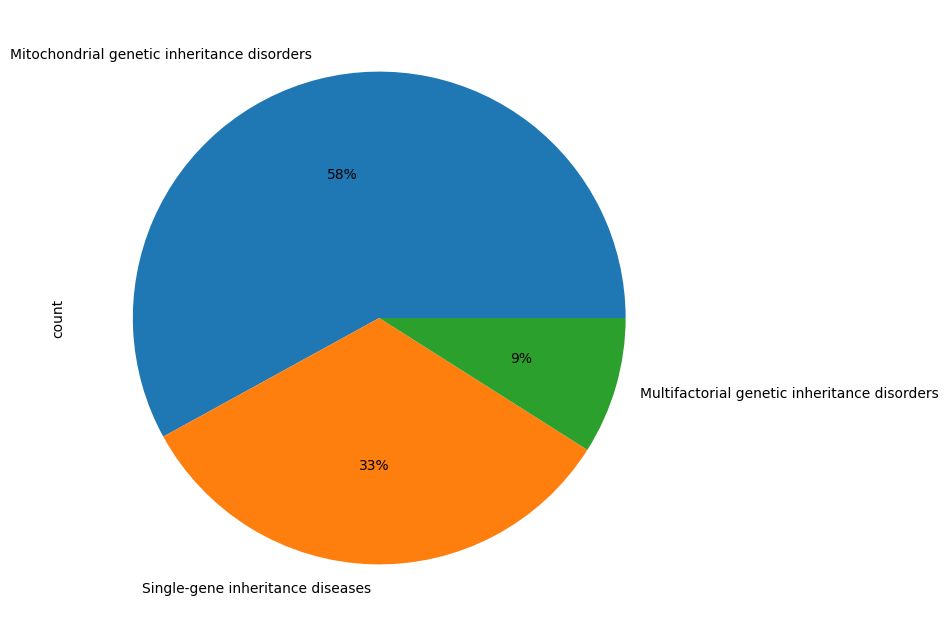

In [ ]:

figure = plt.figure(figsize=(20,8))
df1['Genetic Disorder'].value_counts().plot.pie(autopct='%.0f%%')

plt.show()


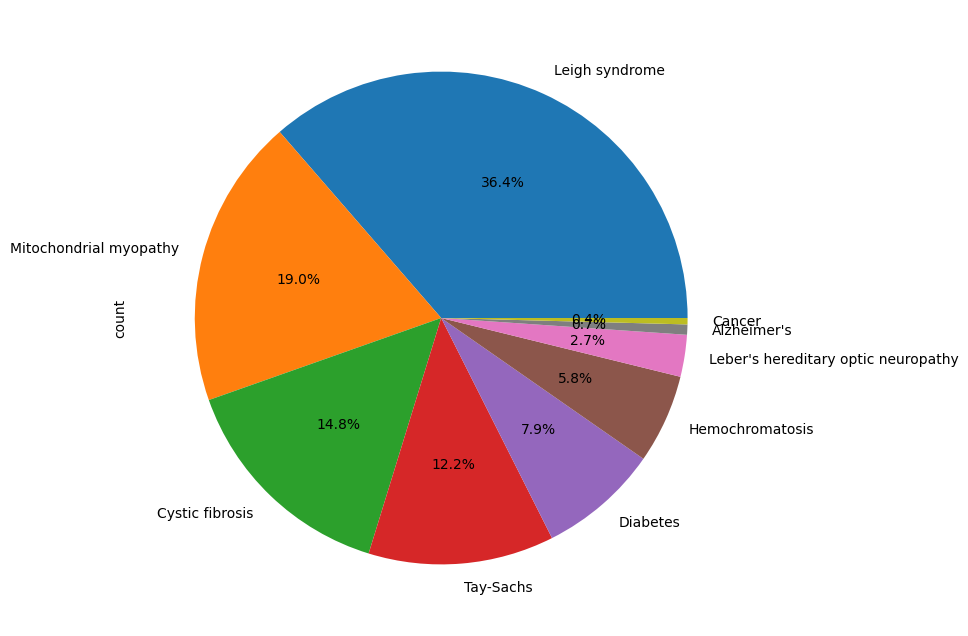

In [ ]:
figure = plt.figure(figsize=(20,8))
df['Disorder Subclass'].value_counts().plot.pie(autopct='%1.1f%%')

plt.show()

In [ ]:
figure = plt.figure(figsize=(30,20))
disorderSubclasses.sort_values().plot.pie(autopct='%1.1f%%', fontsize=30, explode=(0.5,0.4,0.3,0.2,0.1,0,0,0,0,0,0,0,0,0,0,0,0))

plt.show()

In [ ]:
!pip install tensorflow
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/data/x.csv', index_col=0)
y_ds_un= pd.read_csv('/content/drive/MyDrive/data/y_ds.csv', index_col=0)
X_gd = pd.read_csv('/content/drive/MyDrive/data/x_gd_resampled.csv', index_col=0)
y_gd = pd.read_csv('/content/drive/MyDrive/data/y_gd_resampled.csv', index_col=0)
X_ds = pd.read_csv('/content/drive/MyDrive/data/x_ds_resampled.csv', index_col=0)
y_ds = pd.read_csv('/content/drive/MyDrive/data/y_ds_resampled.csv', index_col=0)
X_ds2 = pd.read_csv('/content/drive/MyDrive/data/x_ds+gd_edit_resampled.csv', index_col=0)
y_ds2 = pd.read_csv('/content/drive/MyDrive/data/y_ds+gd_edit_resampled.csv', index_col=0)
X_gdds = pd.read_csv('/content/drive/MyDrive/data/x_gdds_resampled.csv', index_col=0)
y_gdds = pd.read_csv('/content/drive/MyDrive/data/y_gdds_resampled.csv', index_col=0)
X_gdds2 = pd.read_csv('/content/drive/MyDrive/data/x_gdds2_edit_resampled.csv', index_col=0)
y_gdds2 = pd.read_csv('/content/drive/MyDrive/data/y_gdds2_edit_resampled.csv', index_col=0)
X_gdds2

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
y_gd = pd.get_dummies(y_gd)
y_ds = pd.get_dummies(y_ds)
y_ds2 = pd.get_dummies(y_ds2)
y_gdds = pd.get_dummies(y_gdds)
y_gdds2 = pd.get_dummies(y_gdds2)
y_ds_un = pd.get_dummies(y_ds_un)
labelsets = [
    ('GD', X_gd, y_gd),
    ('DS', X_ds, y_ds),
    ('DS_un', X, y_ds_un),
    ('DS2', X_ds2, y_ds2),
    ('GDDS', X_gdds, y_gdds),
    ('GDDS2', X_gdds2, y_gdds2)
]
datasets = {}


In [ ]:
for data in labelsets :

    # Destructure
    name, X, y = data

    # Split data
    X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.7)
    X_val, X_test, y_val, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

    print('-'*9, name, '-'*9)
    print(X_train.shape), print(y_train.shape)
    print(X_val.shape), print(y_val.shape)
    print(X_test.shape), print(y_test.shape)

    datasets[name] = {
        'X': {
            'train' : X_train,
            'val' : X_val,
            'test' : X_test
        },
        'y' : {
            'train': y_train,
            'val': y_val,
            'test': y_test
        }
    }

In [ ]:
def evaluate(y_pred, y_true) :
    y_pred = np.argmax(y_pred, axis=1)
    y_true = np.argmax(np.array(y_true), axis=1)

   # Performance metrics
    accuracy = np.sum(y_pred == y_true) / len(y_pred)
    print('Accuracy:', accuracy)
    print(classification_report(y_true, y_pred))

    # Confusion matrix
    confmat = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confmat)
    disp.plot()


Epoch 1/100
383/383 [==============================] - 3s 5ms/step - loss: 2.2023 - accuracy: 0.1704 - val_loss: 1.9548 - val_accuracy: 0.2251
Epoch 2/100
383/383 [==============================] - 1s 4ms/step - loss: 1.8076 - accuracy: 0.2749 - val_loss: 1.7496 - val_accuracy: 0.2937
Epoch 3/100
383/383 [==============================] - 1s 4ms/step - loss: 1.7149 - accuracy: 0.3067 - val_loss: 1.7124 - val_accuracy: 0.2968
Epoch 4/100
383/383 [==============================] - 3s 7ms/step - loss: 1.6827 - accuracy: 0.3219 - val_loss: 1.6930 - val_accuracy: 0.3074
Epoch 5/100
383/383 [==============================] - 2s 6ms/step - loss: 1.6608 - accuracy: 0.3321 - val_loss: 1.6825 - val_accuracy: 0.3246
Epoch 6/100
383/383 [==============================] - 3s 7ms/step - loss: 1.6473 - accuracy: 0.3395 - val_loss: 1.6744 - val_accuracy: 0.3200
Epoch 7/100
383/383 [==============================] - 2s 5ms/step - loss: 1.6349 - accuracy: 0.3491 - val_loss: 1.6686 - val_accuracy: 0.3215

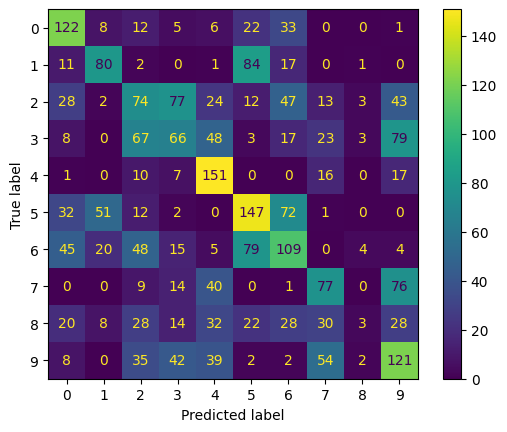

In [ ]:
callback = EarlyStopping(monitor='loss', min_delta=0.005,patience=3)

# Define model - Predict GDDS directly from X, y
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(24, input_dim=28, activation='relu'))
    model.add(Dense(18, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

baseline_model = baseline_model()
baseline_model.fit(
   datasets['GDDS']['X']['train'],
   datasets['GDDS']['y']['train'],
   validation_data=(
   datasets['GDDS']['X']['val'],
   datasets['GDDS']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = baseline_model.predict(datasets['GDDS']['X']['test'])
evaluate(y_pred, datasets['GDDS']['y']['test'])

Epoch 1/100
503/503 [==============================] - 2s 2ms/step - loss: 0.9972 - accuracy: 0.4853 - val_loss: 0.8551 - val_accuracy: 0.5639
Epoch 2/100
503/503 [==============================] - 1s 2ms/step - loss: 0.8207 - accuracy: 0.6007 - val_loss: 0.8199 - val_accuracy: 0.6126
Epoch 3/100
503/503 [==============================] - 1s 2ms/step - loss: 0.7941 - accuracy: 0.6294 - val_loss: 0.8065 - val_accuracy: 0.6225
Epoch 4/100
503/503 [==============================] - 1s 2ms/step - loss: 0.7797 - accuracy: 0.6391 - val_loss: 0.7963 - val_accuracy: 0.6297
Epoch 5/100
503/503 [==============================] - 1s 2ms/step - loss: 0.7710 - accuracy: 0.6447 - val_loss: 0.7920 - val_accuracy: 0.6324
Epoch 6/100
503/503 [==============================] - 1s 2ms/step - loss: 0.7651 - accuracy: 0.6474 - val_loss: 0.7886 - val_accuracy: 0.6318
Epoch 7/100
503/503 [==============================] - 1s 2ms/step - loss: 0.7600 - accuracy: 0.6520 - val_loss: 0.7869 - val_accuracy: 0.6347

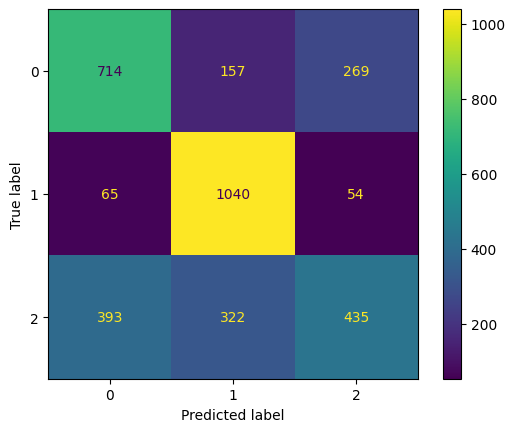

In [ ]:
def GD_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

GD_model = GD_model()
GD_model.fit(
   datasets['GD']['X']['train'],
   datasets['GD']['y']['train'],
   validation_data=(
   datasets['GD']['X']['val'],
   datasets['GD']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = GD_model.predict(datasets['GD']['X']['test'])
evaluate(y_pred, datasets['GD']['y']['test'])

Epoch 1/100
460/460 [==============================] - 2s 2ms/step - loss: 1.7368 - accuracy: 0.2578 - val_loss: 1.4391 - val_accuracy: 0.3454
Epoch 2/100
460/460 [==============================] - 1s 2ms/step - loss: 1.3475 - accuracy: 0.4051 - val_loss: 1.3260 - val_accuracy: 0.4073
Epoch 3/100
460/460 [==============================] - 1s 2ms/step - loss: 1.2935 - accuracy: 0.4310 - val_loss: 1.3051 - val_accuracy: 0.4137
Epoch 4/100
460/460 [==============================] - 1s 2ms/step - loss: 1.2731 - accuracy: 0.4383 - val_loss: 1.2970 - val_accuracy: 0.4133
Epoch 5/100
460/460 [==============================] - 1s 2ms/step - loss: 1.2622 - accuracy: 0.4434 - val_loss: 1.2894 - val_accuracy: 0.4251
Epoch 6/100
460/460 [==============================] - 1s 2ms/step - loss: 1.2544 - accuracy: 0.4492 - val_loss: 1.2828 - val_accuracy: 0.4244
Epoch 7/100
460/460 [==============================] - 1s 3ms/step - loss: 1.2486 - accuracy: 0.4523 - val_loss: 1.2824 - val_accuracy: 0.4197

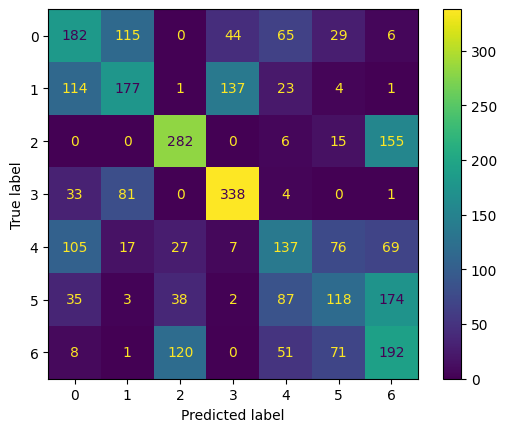

In [ ]:
def DS_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

DS_model = DS_model()
DS_model.fit(
   datasets['DS']['X']['train'],
   datasets['DS']['y']['train'],
   validation_data=(
   datasets['DS']['X']['val'],
   datasets['DS']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model.predict(datasets['DS']['X']['test'])
evaluate(y_pred, datasets['DS']['y']['test'])

Epoch 1/100
467/467 [==============================] - 2s 2ms/step - loss: 1.7263 - accuracy: 0.3102 - val_loss: 1.5604 - val_accuracy: 0.3482
Epoch 2/100
467/467 [==============================] - 1s 2ms/step - loss: 1.4199 - accuracy: 0.3892 - val_loss: 1.3767 - val_accuracy: 0.3948
Epoch 3/100
467/467 [==============================] - 1s 2ms/step - loss: 1.3305 - accuracy: 0.4149 - val_loss: 1.3386 - val_accuracy: 0.4194
Epoch 4/100
467/467 [==============================] - 1s 3ms/step - loss: 1.3114 - accuracy: 0.4202 - val_loss: 1.3341 - val_accuracy: 0.4176
Epoch 5/100
467/467 [==============================] - 1s 3ms/step - loss: 1.3013 - accuracy: 0.4245 - val_loss: 1.3220 - val_accuracy: 0.4200
Epoch 6/100
467/467 [==============================] - 1s 2ms/step - loss: 1.2946 - accuracy: 0.4309 - val_loss: 1.3208 - val_accuracy: 0.4204
Epoch 7/100
467/467 [==============================] - 1s 2ms/step - loss: 1.2904 - accuracy: 0.4327 - val_loss: 1.3159 - val_accuracy: 0.4329

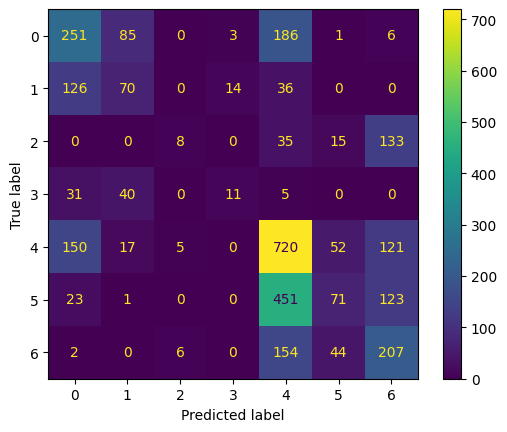

In [ ]:
def DS_model2():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=28, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

DS_model2 = DS_model2()
DS_model2.fit(
   datasets['DS_un']['X']['train'],
   datasets['DS_un']['y']['train'],
   validation_data=(
   datasets['DS_un']['X']['val'],
   datasets['DS_un']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model2.predict(datasets['DS_un']['X']['test'])
evaluate(y_pred, datasets['DS_un']['y']['test'])

Epoch 1/100
460/460 [==============================] - 2s 2ms/step - loss: 1.6088 - accuracy: 0.3667 - val_loss: 0.9810 - val_accuracy: 0.6279
Epoch 2/100
460/460 [==============================] - 1s 3ms/step - loss: 0.7511 - accuracy: 0.7000 - val_loss: 0.6348 - val_accuracy: 0.7289
Epoch 3/100
460/460 [==============================] - 1s 3ms/step - loss: 0.6411 - accuracy: 0.7287 - val_loss: 0.6077 - val_accuracy: 0.7321
Epoch 4/100
460/460 [==============================] - 1s 3ms/step - loss: 0.6229 - accuracy: 0.7305 - val_loss: 0.5969 - val_accuracy: 0.7349
Epoch 5/100
460/460 [==============================] - 1s 3ms/step - loss: 0.6145 - accuracy: 0.7359 - val_loss: 0.5949 - val_accuracy: 0.7343
Epoch 6/100
460/460 [==============================] - 1s 2ms/step - loss: 0.6095 - accuracy: 0.7372 - val_loss: 0.5908 - val_accuracy: 0.7378
Epoch 7/100
460/460 [==============================] - 1s 2ms/step - loss: 0.6061 - accuracy: 0.7347 - val_loss: 0.5887 - val_accuracy: 0.7432

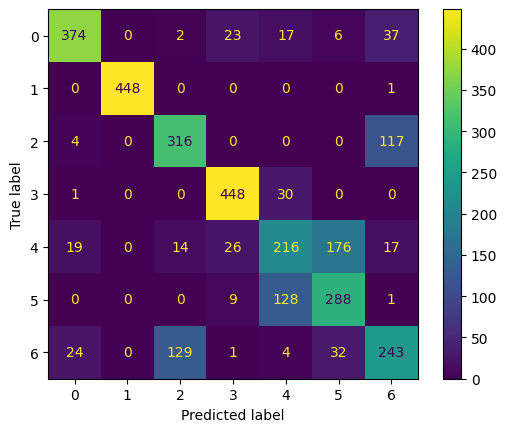

In [ ]:
def DS_model3():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=31, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

DS_model3 = DS_model3()
DS_model3.fit(
   datasets['DS2']['X']['train'],
   datasets['DS2']['y']['train'],
   validation_data=(
   datasets['DS2']['X']['val'],
   datasets['DS2']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = DS_model3.predict(datasets['DS2']['X']['test'])
evaluate(y_pred, datasets['DS2']['y']['test'])

In [ ]:
test_sample = datasets['DS2']['X']['test'].iloc[3]  # Taking the sample from test data for prediction
test_sample = np.expand_dims(test_sample, axis=0)
true_label = datasets['DS2']['y']['test'].iloc[3]
print(true_label) # Adding batch dimension as model expects input shape (batch_size, input_dim)

# Make prediction
prediction = DS_model3.predict(test_sample)
formatted_probabilities = ["{:.6f}".format(prob) for prob in prediction[0]]
print("Formatted probabilities:", formatted_probabilities)

Disorder Subclass_Cystic fibrosis                        False
Disorder Subclass_Diabetes                               False
Disorder Subclass_Hemochromatosis                        False
Disorder Subclass_Leber's hereditary optic neuropathy    False
Disorder Subclass_Leigh syndrome                         False
Disorder Subclass_Mitochondrial myopathy                  True
Disorder Subclass_Tay-Sachs                              False
Name: 16901, dtype: bool
1/1 [==============================] - 0s 53ms/step
Formatted probabilities: ['0.014479', '0.000000', '0.000025', '0.001650', '0.401194', '0.558400', '0.024252']


Epoch 1/100
383/383 [==============================] - 2s 3ms/step - loss: 2.1110 - accuracy: 0.2229 - val_loss: 1.6907 - val_accuracy: 0.3851
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 1.2531 - accuracy: 0.5003 - val_loss: 1.0007 - val_accuracy: 0.5581
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 0.9281 - accuracy: 0.5827 - val_loss: 0.8935 - val_accuracy: 0.5897
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.8748 - accuracy: 0.6079 - val_loss: 0.8806 - val_accuracy: 0.5954
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 0.8585 - accuracy: 0.6064 - val_loss: 0.8608 - val_accuracy: 0.6015
Epoch 6/100
383/383 [==============================] - 1s 2ms/step - loss: 0.8456 - accuracy: 0.6190 - val_loss: 0.8554 - val_accuracy: 0.6061
Epoch 7/100
383/383 [==============================] - 1s 2ms/step - loss: 0.8384 - accuracy: 0.6250 - val_loss: 0.8509 - val_accuracy: 0.6053

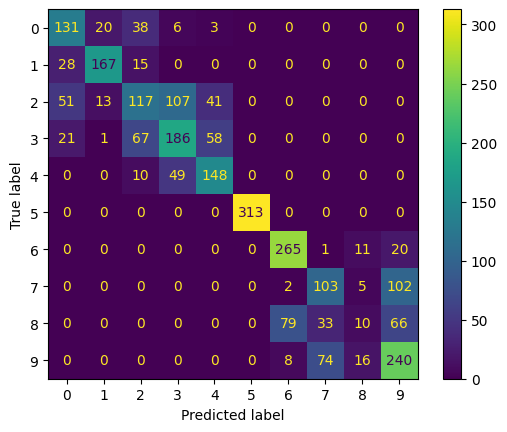

In [ ]:
def GDDS_model():
    # create model
    model = Sequential()
    model.add(Dense(14, input_dim=31, activation='relu'))
    model.add(Dense(14, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

GDDS_model = GDDS_model()
GDDS_model.fit(
   datasets['GDDS2']['X']['train'],
   datasets['GDDS2']['y']['train'],
   validation_data=(
   datasets['GDDS2']['X']['val'],
   datasets['GDDS2']['y']['val']),
   epochs=100,
   callbacks=[callback]
)
y_pred = GDDS_model.predict(datasets['GDDS2']['X']['test'])
evaluate(y_pred, datasets['GDDS2']['y']['test'])

In [ ]:
datasets['GDDS2']['y']['test']

,Combined_Mitochondrial genetic inheritance disorders - Cystic fibrosis,Combined_Mitochondrial genetic inheritance disorders - Leber's hereditary optic neuropathy,Combined_Mitochondrial genetic inheritance disorders - Leigh syndrome,Combined_Mitochondrial genetic inheritance disorders - Mitochondrial myopathy,Combined_Mitochondrial genetic inheritance disorders - Tay-Sachs,Combined_Multifactorial genetic inheritance disorders - Diabetes,Combined_Single-gene inheritance diseases - Cystic fibrosis,Combined_Single-gene inheritance diseases - Hemochromatosis,Combined_Single-gene inheritance diseases - Leigh syndrome,Combined_Single-gene inheritance diseases - Tay-Sachs
16026,False,False,False,False,False,False,False,False,False,True
11323,False,False,False,False,False,False,True,False,False,False
1239,True,False,False,False,False,False,False,False,False,False
16387,False,False,False,False,False,False,False,False,False,True
10553,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1401,False,True,False,False,False,False,False,False,False,False
15515,False,False,False,False,False,False,False,False,False,True
9433,False,False,False,False,False,True,False,False,False,False
4286,False,False,True,False,False,False,False,False,False,False


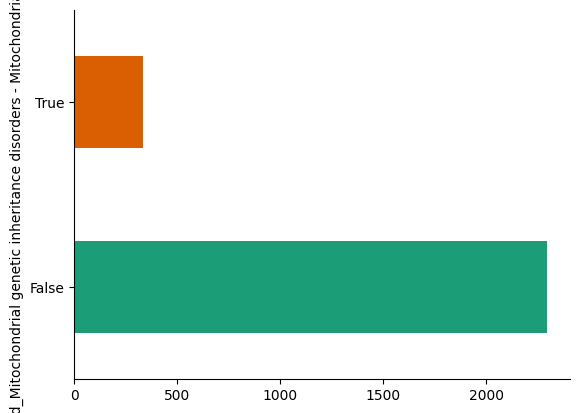

In [ ]:
# @title Combined_Mitochondrial genetic inheritance disorders - Mitochondrial myopathy

from matplotlib import pyplot as plt
import seaborn as sns
y_test.groupby('Combined_Mitochondrial genetic inheritance disorders - Mitochondrial myopathy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

99/99 [==============================] - 0s 1ms/step
Accuracy: 0.365598222786417
              precision    recall  f1-score   support

           0       0.39      0.38      0.38       459
           1       0.36      0.80      0.50       449
           2       0.65      0.32      0.43       437
           3       0.00      0.00      0.00       479
           4       0.32      0.36      0.34       468
           5       0.34      0.19      0.24       426
           6       0.32      0.54      0.40       433

    accuracy                           0.37      3151
   macro avg       0.34      0.37      0.33      3151
weighted avg       0.33      0.37      0.32      3151



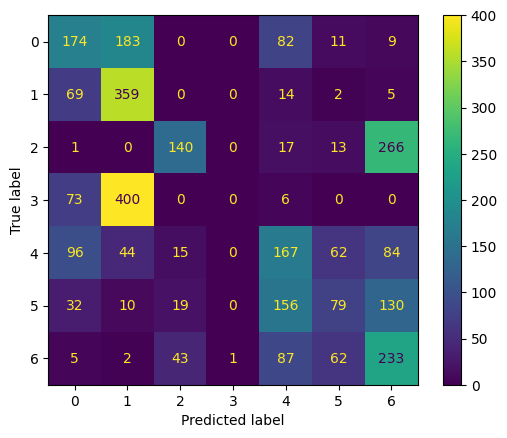

In [ ]:
GD_pred = GD_model.predict(datasets['DS2']['X']['test'].iloc[:,:28])
X_pred = datasets['DS2']['X']['test'].iloc[:,:28].reset_index(drop=True).join(pd.DataFrame(GD_pred))
y_pred = DS_model3.predict(X_pred)
evaluate(y_pred, datasets['DS2']['y']['test'])

83/83 [==============================] - 0s 1ms/step
Accuracy: 0.2975238095238095
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       198
           1       0.06      0.01      0.02       210
           2       0.31      0.25      0.27       329
           3       0.25      0.38      0.30       333
           4       0.29      0.03      0.06       207
           5       0.31      0.85      0.45       313
           6       0.32      0.25      0.28       297
           7       0.34      0.47      0.39       212
           8       0.50      0.01      0.01       188
           9       0.29      0.37      0.33       338

    accuracy                           0.30      2625
   macro avg       0.27      0.26      0.21      2625
weighted avg       0.27      0.30      0.24      2625



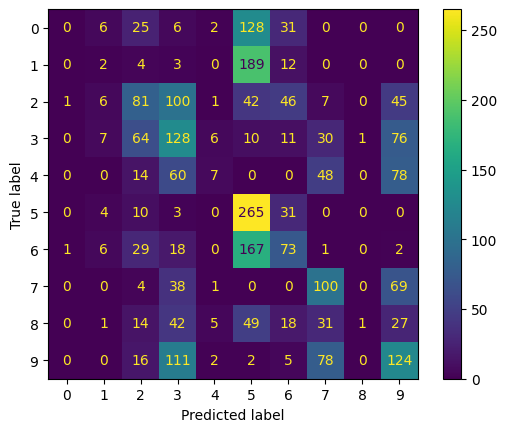

In [ ]:
GD_pred = GD_model.predict(datasets['GDDS2']['X']['test'].iloc[:,:28])
X_pred = datasets['GDDS2']['X']['test'].iloc[:,:28].reset_index(drop=True).join(pd.DataFrame(GD_pred))
y_pred = GDDS_model.predict(X_pred)
evaluate(y_pred, datasets['GDDS2']['y']['test'])

In [ ]:
GD_pred[4]

array([0.6202511 , 0.09812041, 0.28162843], dtype=float32)

In [ ]:

test = datasets['GDDS2']['X']['test'].iloc[:,28:]
test.iloc[4,:]

Mitochondrial genetic inheritance disorders     0
Multifactorial genetic inheritance disorders    0
Single-gene inheritance diseases                1
Name: 10553, dtype: int64